In [1]:
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim

In [2]:
train_batch_size = 100
test_batch_size = 1000

In [3]:
# load MNIST dataset

mnist_trainset = datasets.MNIST(root = './data', train = True,transform = transforms.ToTensor(), download = True)
mnist_testset = datasets.MNIST(root = './data', train = False,transform = transforms.ToTensor(), download = True)

train_loader =  torch.utils.data.DataLoader(mnist_trainset, batch_size = train_batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(mnist_testset, batch_size = test_batch_size, shuffle = False)

In [4]:
example = iter(train_loader)

In [5]:
example_data, example_targets = example.next()

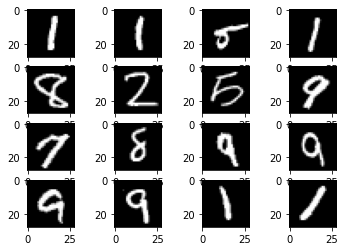

In [6]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()

In [7]:
# Build a NN model

input_features = len(example_data[0][0])**2
hidden_features = 500
output_features = 10

model = nn.Sequential(
    nn.Linear(input_features,hidden_features),
    nn.ReLU(),
    nn.Linear(hidden_features,output_features)
    )

In [8]:
# initialization

def init_wandb(m):
    if type(m) == nn.Linear:
        #nn.init.xavier_uniform_(m.weight)
        nn.init.normal_(m.weight,mean=0, std=0.01)
        m.bias.data.fill_(0.00)
        
model.apply(init_wandb)

Sequential(
  (0): Linear(in_features=784, out_features=500, bias=True)
  (1): ReLU()
  (2): Linear(in_features=500, out_features=10, bias=True)
)

In [9]:
# Hyper-Parameters

epochs = 5
lr = 0.001
momentum = 0.9

In [10]:
#define loss function and optimizer

loss_fn = nn.CrossEntropyLoss()
#optimizer = optim.SGD(model.parameters(), lr = lr, momentum=momentum)
optimizer = optim.Adam(model.parameters(), lr = lr)

In [11]:
# Model training

model.train()
no_batch = len(mnist_trainset)//train_batch_size
for epoch in range(epochs):
    for i,(img,label) in enumerate(train_loader):
        optimizer.zero_grad()
        predict=model(img.reshape(-1,input_features))
        loss = loss_fn(predict,label)
        loss.backward()
        optimizer.step()
        if (i+1)% 100 == 0:
            print(f'Epoch: {epoch+1}/{epochs}, Step: {i+1}/{no_batch}, Loss: {loss.item():.4f}')

Epoch: 1/5, Step: 100/600, Loss: 0.3105
Epoch: 1/5, Step: 200/600, Loss: 0.3566
Epoch: 1/5, Step: 300/600, Loss: 0.2132
Epoch: 1/5, Step: 400/600, Loss: 0.2874
Epoch: 1/5, Step: 500/600, Loss: 0.3140
Epoch: 1/5, Step: 600/600, Loss: 0.1163
Epoch: 2/5, Step: 100/600, Loss: 0.2162
Epoch: 2/5, Step: 200/600, Loss: 0.0697
Epoch: 2/5, Step: 300/600, Loss: 0.1136
Epoch: 2/5, Step: 400/600, Loss: 0.0827
Epoch: 2/5, Step: 500/600, Loss: 0.1446
Epoch: 2/5, Step: 600/600, Loss: 0.0613
Epoch: 3/5, Step: 100/600, Loss: 0.1475
Epoch: 3/5, Step: 200/600, Loss: 0.1050
Epoch: 3/5, Step: 300/600, Loss: 0.1464
Epoch: 3/5, Step: 400/600, Loss: 0.0924
Epoch: 3/5, Step: 500/600, Loss: 0.0531
Epoch: 3/5, Step: 600/600, Loss: 0.0479
Epoch: 4/5, Step: 100/600, Loss: 0.0402
Epoch: 4/5, Step: 200/600, Loss: 0.1437
Epoch: 4/5, Step: 300/600, Loss: 0.0877
Epoch: 4/5, Step: 400/600, Loss: 0.0662
Epoch: 4/5, Step: 500/600, Loss: 0.0240
Epoch: 4/5, Step: 600/600, Loss: 0.0400
Epoch: 5/5, Step: 100/600, Loss: 0.0123


In [12]:
# Model evaluation

model.eval()
n_correct = 0
n_samples = 0
for img,label in test_loader:
    predict = model(img.reshape(-1,input_features))
    _,num_predict = torch.max(predict,1)
    n_correct_batch = (num_predict==label).sum().item()
    n_samples += test_batch_size
    n_correct += n_correct_batch
    print(f'Test batch accuracy: {n_correct_batch/test_batch_size*100:.2f}% , Accumulated accuracy: {n_correct/n_samples*100:.2f}%')
print(f'Total accuracy: {n_correct/n_samples*100:.2f}%')

Test batch accuracy: 97.90% , Accumulated accuracy: 97.90%
Test batch accuracy: 96.60% , Accumulated accuracy: 97.25%
Test batch accuracy: 96.90% , Accumulated accuracy: 97.13%
Test batch accuracy: 97.00% , Accumulated accuracy: 97.10%
Test batch accuracy: 97.60% , Accumulated accuracy: 97.20%
Test batch accuracy: 98.20% , Accumulated accuracy: 97.37%
Test batch accuracy: 98.50% , Accumulated accuracy: 97.53%
Test batch accuracy: 99.60% , Accumulated accuracy: 97.79%
Test batch accuracy: 99.10% , Accumulated accuracy: 97.93%
Test batch accuracy: 98.10% , Accumulated accuracy: 97.95%
Total accuracy: 97.95%
